In [1]:
#import data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

#import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'


In [2]:
df = pd.read_csv('/Users/zerindong/Desktop/Analysis/datasets/Mass Shootings Dataset.csv')

In [3]:
df.head()

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,NaN,58,515,573,Unclear,NaN,NaN,NaN,NaN
1,2,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,NaN,NaN
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,NaN,NaN
3,4,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,M,NaN,NaN
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,M,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
S#                      398 non-null int64
Title                   398 non-null object
Location                398 non-null object
Date                    398 non-null object
Summary                 397 non-null object
Fatalities              398 non-null int64
Injured                 398 non-null int64
Total victims           398 non-null int64
Mental Health Issues    398 non-null object
Race                    395 non-null object
Gender                  397 non-null object
Latitude                378 non-null float64
Longitude               378 non-null float64
dtypes: float64(2), int64(4), object(7)
memory usage: 40.5+ KB


In [5]:
df.isnull().sum()

S#                       0
Title                    0
Location                 0
Date                     0
Summary                  1
Fatalities               0
Injured                  0
Total victims            0
Mental Health Issues     0
Race                     3
Gender                   1
Latitude                20
Longitude               20
dtype: int64

In [6]:
df=df.drop('Summary',axis=1)

In [8]:
import datetime
from datetime import date
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [9]:
df.head()

,S#,Title,Location,Date,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude,year,month
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,58,515,573,Unclear,NaN,NaN,NaN,NaN,2017,10
1,2,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,3,2,5,Yes,Asian,M,NaN,NaN,2017,6
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",2017-06-07,3,0,3,Unclear,White,M,NaN,NaN,2017,6
3,4,Florida awning manufacturer shooting,"Orlando, Florida",2017-06-05,5,0,5,Unclear,NaN,M,NaN,NaN,2017,6
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",2017-05-12,3,0,3,Yes,White,M,NaN,NaN,2017,5


In [18]:
df.groupby(['year'], sort=True)[['Injured']].sum().sort_values(by=['Injured'], ascending=False).reset_index().head(6)

,year,Injured
0,2017,523
1,2016,289
2,2015,220
3,2012,178
4,1999,103
5,2007,87


In [55]:
df.groupby(['year'], sort=True)[['Fatalities']].sum().sort_values(by=['Fatalities'], ascending=False).reset_index().head(6)

,year,Fatalities
0,2015,255
1,2016,220
2,2012,165
3,2007,120
4,2013,111
5,2009,96


In [41]:
df.groupby(['Race'], sort=True)[['Injured']].sum().sort_values(by=['Injured'], ascending=False).reset_index()

,Race,Injured
0,White American or European American,683
1,white,391
2,Black American or African American,305
3,Unknown,143
4,Other,115
5,Some other race,71
6,Asian American,61
7,black,37
8,Black,36
9,Asian,33


In [57]:
df.groupby(['Race'], sort=True)[['Fatalities']].sum().sort_values(by=['Fatalities'], ascending=False).reset_index()

,Race,Fatalities
0,White American or European American,696
1,White,381
2,Black American or African American,212
3,Other,172
4,Asian American,127
5,Black,85
6,Unknown,79
7,Asian,74
8,Latino,33
9,Native American,19


In [42]:
df.groupby(['Gender'], sort=True)[['Injured']].sum().sort_values(by=['Injured'], ascending=False).reset_index()

,Gender,Injured
0,Male,1695
1,M,126
2,Unknown,86
3,Female,23
4,Male/Female,22
5,M/F,21


In [44]:
df.groupby(['Location'], sort=True)[['Injured']].sum().sort_values(by=['Injured'], ascending=False).reset_index().head(6)

,Location,Injured
0,"Las Vegas, NV",515
1,"Fort Hood, Texas",74
2,"Aurora, Colorado",72
3,"Orlando, Florida",63
4,"Killeen, Texas",60
5,"Stockton, California",59


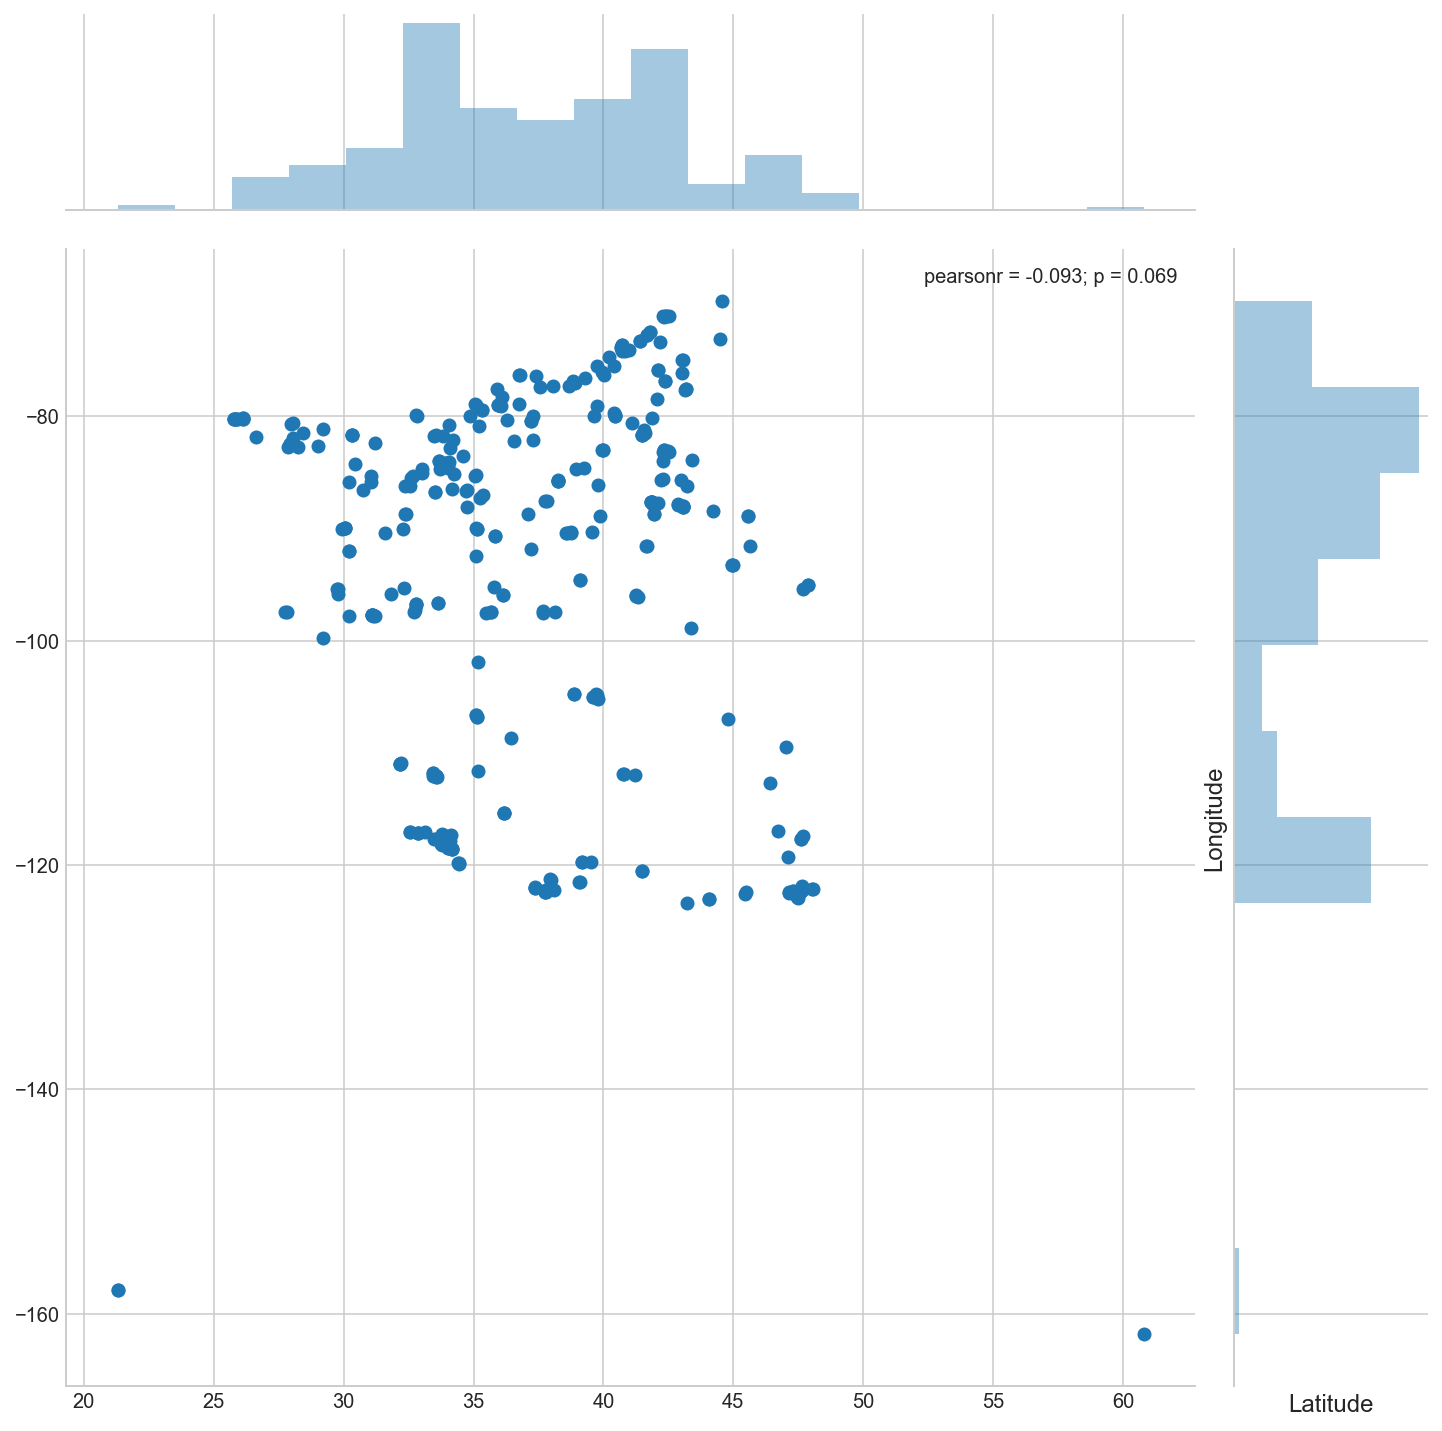

In [52]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df.Latitude.values, y=df.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

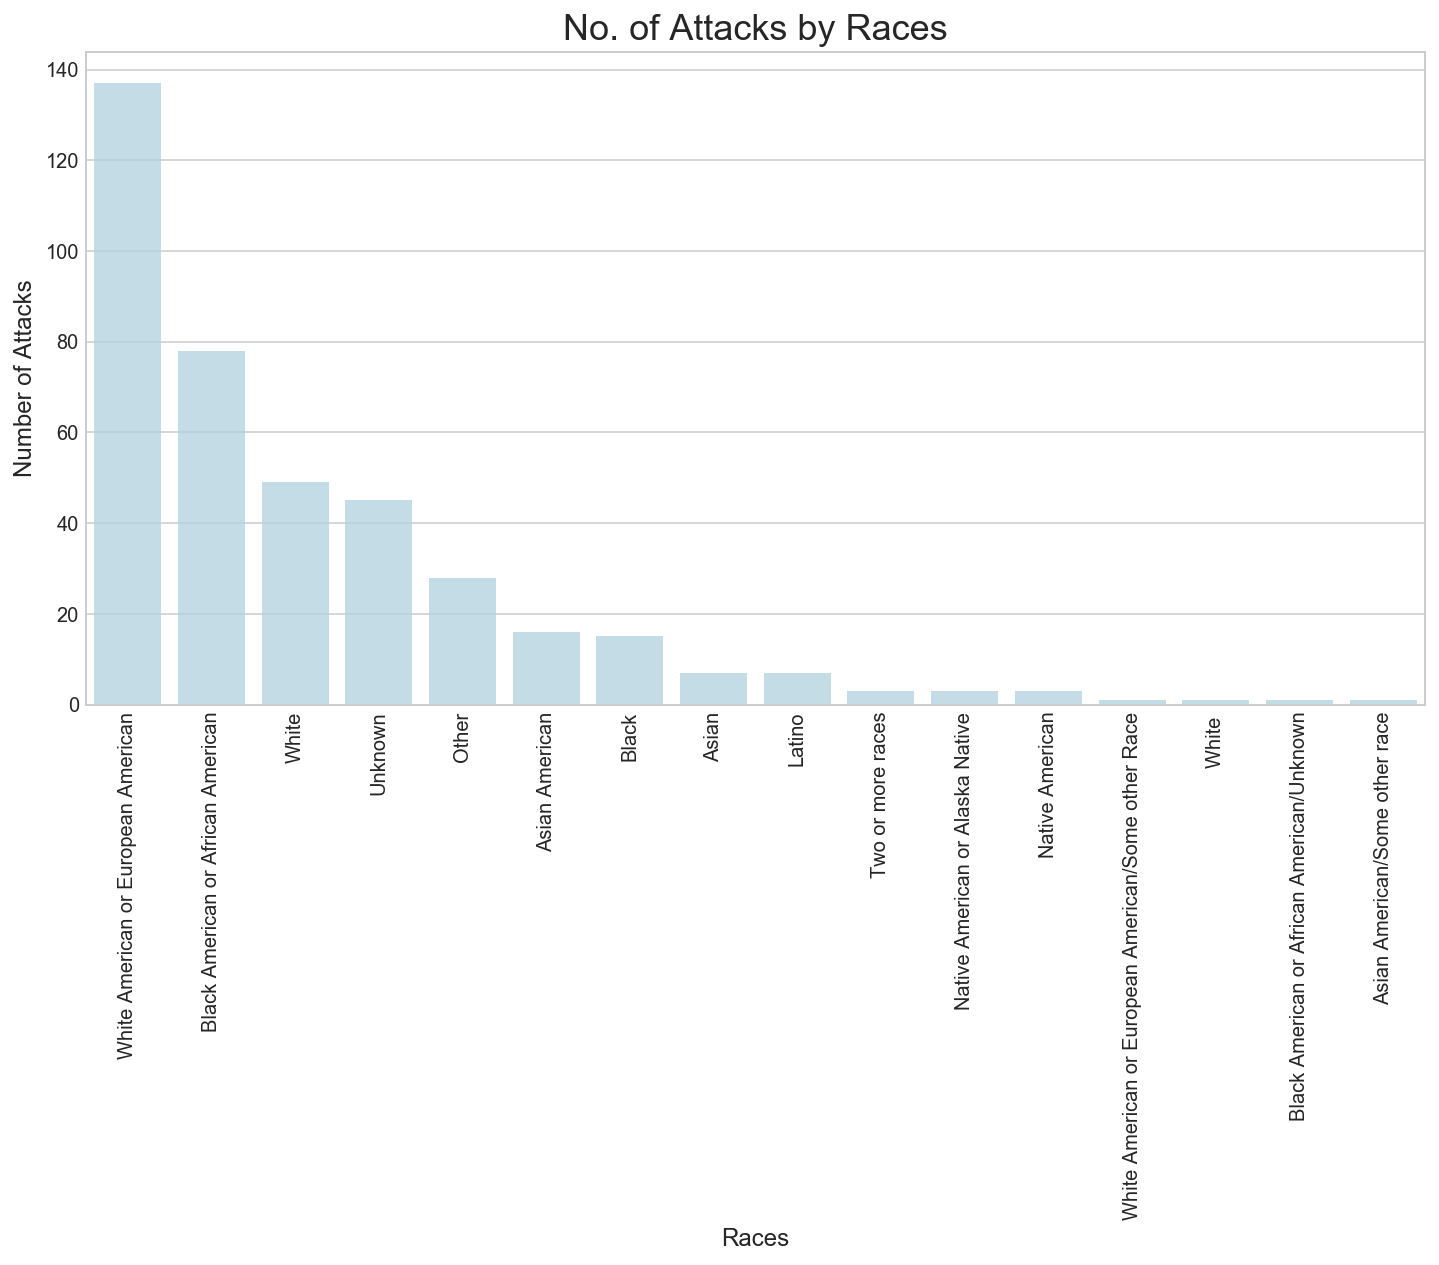

In [53]:
df.Race.replace(['white', 'black', 'Some other race', 'unclear'], ['White', 'Black', 'Other','Unknown'], inplace=True)

cnt_srs = df['Race'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='lightblue')
plt.xticks(rotation='vertical')
plt.xlabel('Races', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks by Races', fontsize=18)
plt.show()

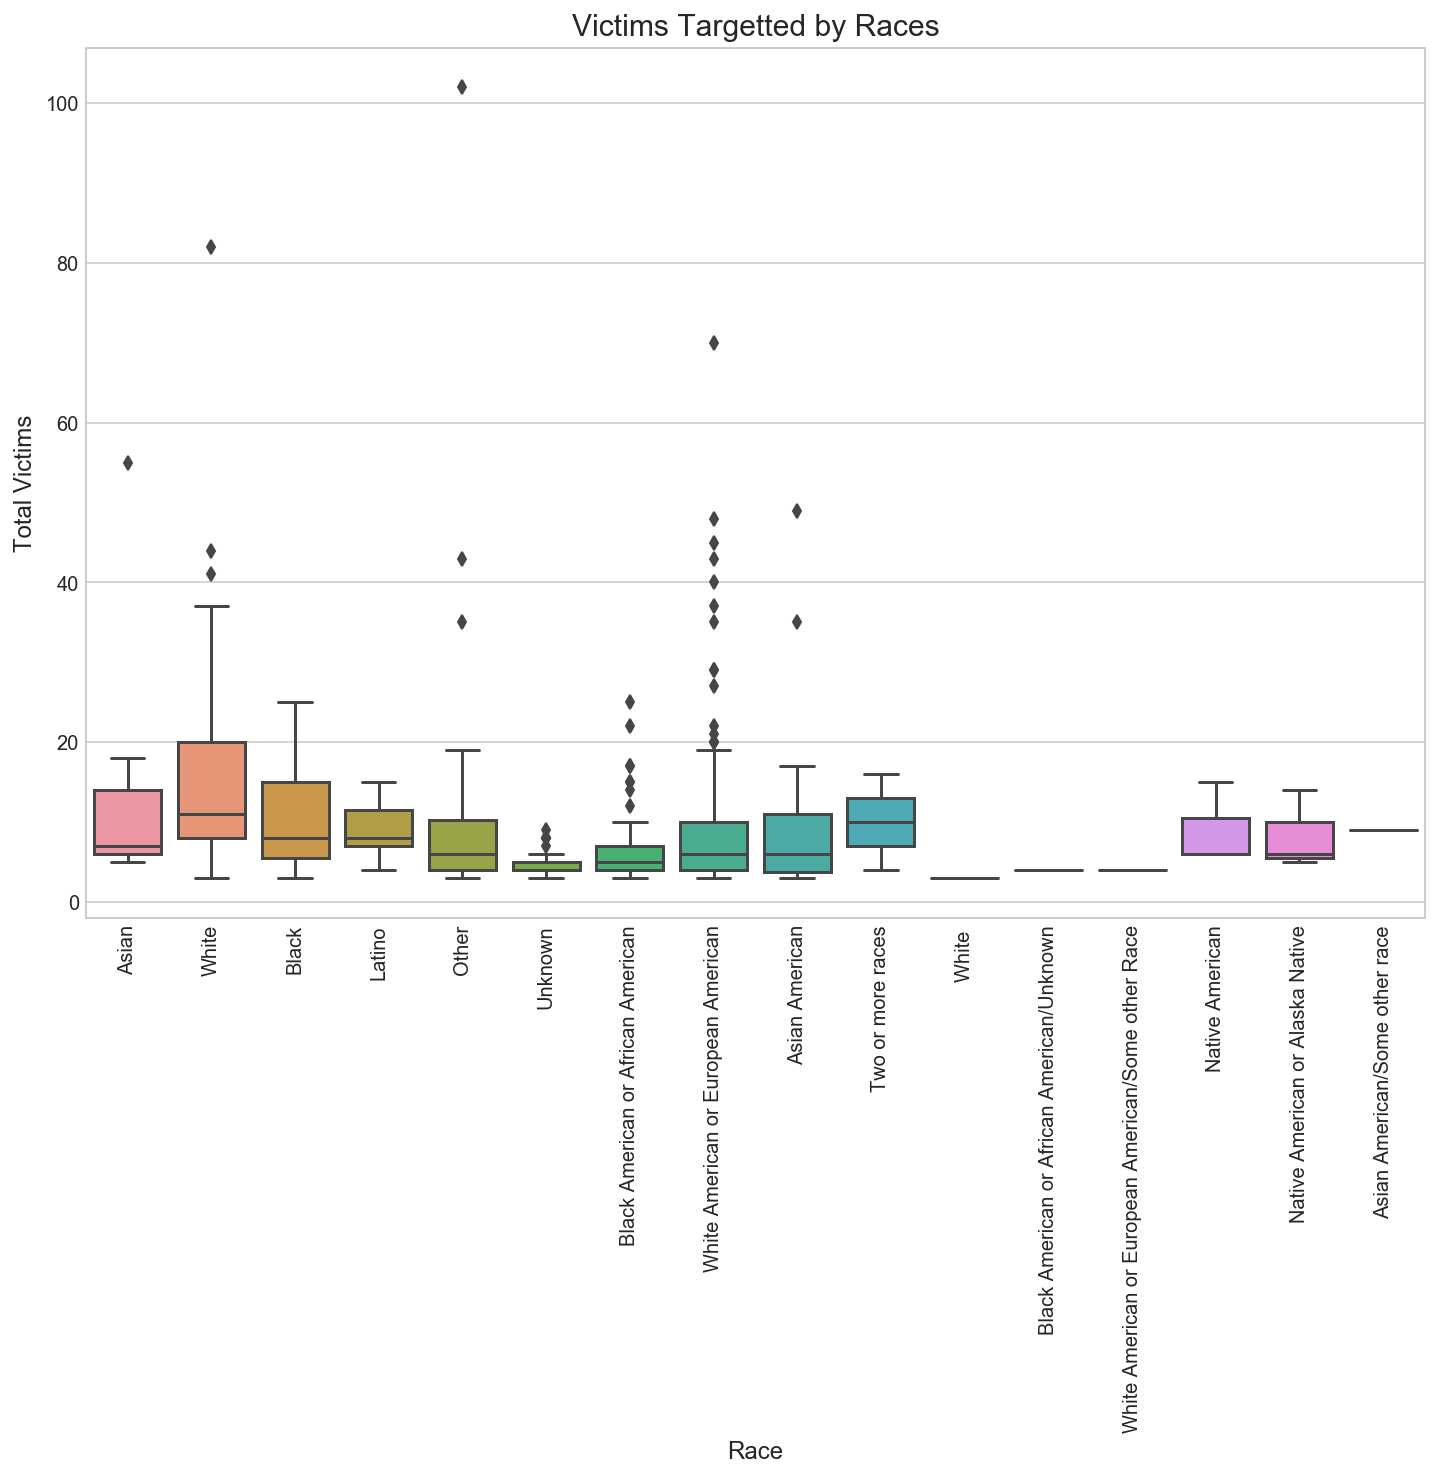

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Race", y="Total victims", data=df)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims Targetted by Races", fontsize=15)
plt.show()